# Evaluate Helios 1, Helios 2 Spacecraft Trajectories

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import argrelextrema
from scipy import interpolate
import numpy as np
import scipy
import copy
import pickle
import math
import datetime as dt 

import heliopy.data.spice as spicedata
import heliopy.spice as spice
from astropy.coordinates import SkyCoord
import astropy.units as u
from code.carrington_dates import *

In [2]:
#matplotlib notebook
import matplotlib
plt.rcParams['savefig.facecolor'] = 'white'
fs1 = 15
font = {'family' : 'serif',
        'size'   : 13}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13) 

# Helios 1 Spacecraft 

# Set large time interval 

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.

In [3]:
starttime = dt.datetime(year=1975, month=1, day=15)
endtime = dt.datetime(year=1984, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

# Helios 1 Trajectory 

In [4]:
spicedata.get_kernel('helios1')
helios1_traj = spice.Trajectory('Helios 1')
helios1_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios1_coords = helios1_traj.coords

# Earth Trajectory 

In [5]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory Plot


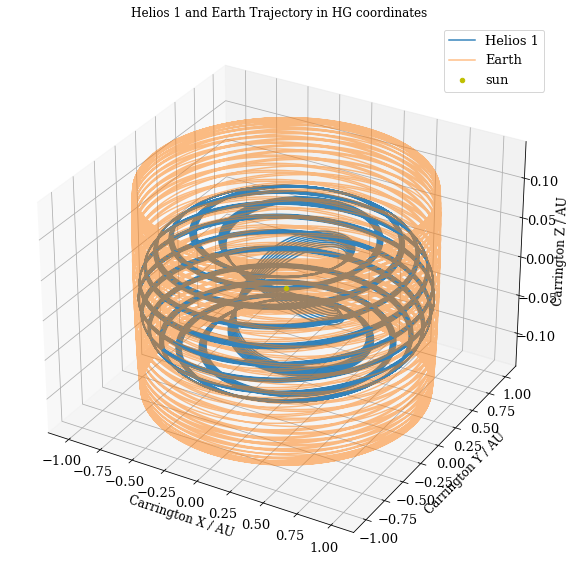

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios1_traj.x.to(u.au), helios1_traj.y.to(u.au), helios1_traj.z.to(u.au), alpha=0.9, label="Helios 1")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="sun")

_ = ax.set_xlabel("Carrington X / AU", fontsize=fs1)
_ = ax.set_ylabel("Carrington Y / AU", fontsize=fs1)
_ = ax.set_zlabel("Carrington Z / AU", fontsize=fs1)
_ = ax.legend()
_ = ax.set_title("Helios 1 and Earth Trajectory in HG coordinates", fontsize=fs1)
plt.savefig('figures/helios1/helios_trajectory_location.png')

# Plot the distance between Helios1 and Earth in HG coordinates

In [7]:
theta_diff = np.abs(helios1_traj.coords.lat - earth_traj.coords.lat)
radial_diff =  np.abs(helios1_traj.coords.radius.to(u.AU) - earth_traj.coords.radius.to(u.AU))

In [8]:
min_both_index = argrelextrema(theta_diff.value, np.less)

In [9]:
cr1b , cr1e, _ = get_time_interval("cr1634")
cr2b , cr2e, _ = get_time_interval("cr1647")
cr3b , cr3e, _ = get_time_interval("cr1653")

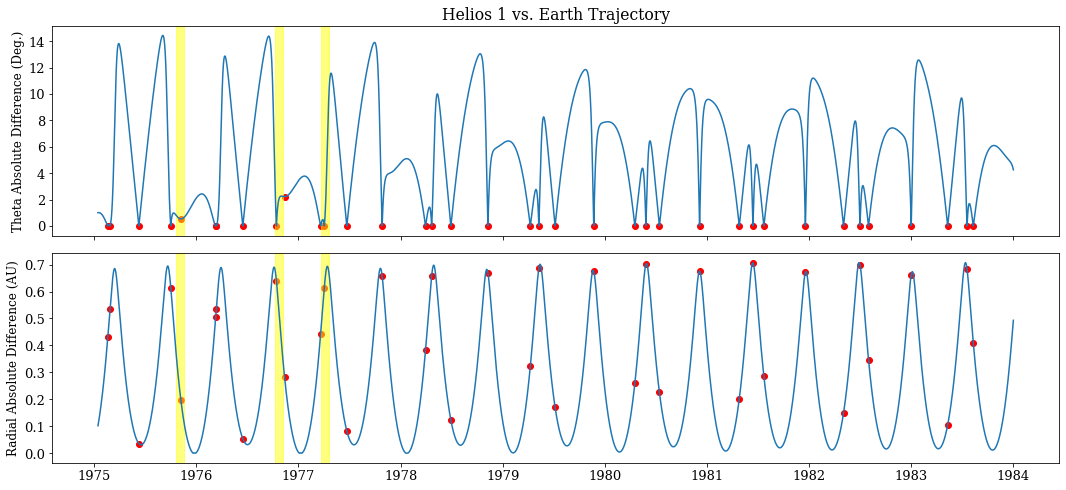

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, sharex=True, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)", fontsize=fs1)
_ = ax[0].axvspan(cr1b, cr1e, alpha=0.5, color='yellow')
_ = ax[0].axvspan(cr2b, cr2e, alpha=0.5, color='yellow')
_ = ax[0].axvspan(cr3b, cr3e, alpha=0.5, color='yellow')

_ = ax[1].plot(times, radial_diff)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)", fontsize=fs1)
_ = ax[1].axvspan(cr1b, cr1e, alpha=0.5, color='yellow')
_ = ax[1].axvspan(cr2b, cr2e, alpha=0.5, color='yellow')
_ = ax[1].axvspan(cr3b, cr3e, alpha=0.5, color='yellow')
_ = ax[0].scatter(times[min_both_index], theta_diff[min_both_index], c="r")
_ = ax[1].scatter(times[min_both_index], radial_diff[min_both_index], c="r")

_ = ax[0].set_title("Helios 1 vs. Earth Trajectory")

plt.tight_layout()
plt.savefig('figures/helios1/helios1_earth_alignment.png', dpi=500)

# Helios 1 local minima

In [11]:
times[min_both_index]

array(['1975-02-19T07:00:00.000000', '1975-02-27T02:00:00.000000',
       '1975-06-10T06:00:00.000000', '1975-10-02T07:00:00.000000',
       '1975-11-07T13:00:00.000000', '1976-03-10T21:00:00.000000',
       '1976-03-13T05:00:00.000000', '1976-06-15T22:00:00.000000',
       '1976-10-14T00:00:00.000000', '1976-11-12T07:00:00.000000',
       '1977-03-21T02:00:00.000000', '1977-04-03T05:00:00.000000',
       '1977-06-22T19:00:00.000000', '1977-10-27T01:00:00.000000',
       '1978-03-31T07:00:00.000000', '1978-04-22T04:00:00.000000',
       '1978-06-29T23:00:00.000000', '1978-11-09T07:00:00.000000',
       '1979-04-09T20:00:00.000000', '1979-05-10T09:00:00.000000',
       '1979-07-07T11:00:00.000000', '1979-11-22T16:00:00.000000',
       '1980-04-17T18:00:00.000000', '1980-05-27T05:00:00.000000',
       '1980-07-14T11:00:00.000000', '1980-12-05T02:00:00.000000',
       '1981-04-26T02:00:00.000000', '1981-06-13T22:00:00.000000',
       '1981-07-22T23:00:00.000000', '1981-12-18T11:00:00.0000

In [12]:
for ii in min_both_index[0]:
    if theta_diff[ii].to(u.deg).value < 1 and radial_diff[ii].to(u.au).value > 0.5:
        print(times[ii])

1975-02-27T02:00:00.000000
1975-10-02T07:00:00.000000
1976-03-10T21:00:00.000000
1976-03-13T05:00:00.000000
1976-10-14T00:00:00.000000
1977-04-03T05:00:00.000000
1977-10-27T01:00:00.000000
1978-04-22T04:00:00.000000
1978-11-09T07:00:00.000000
1979-05-10T09:00:00.000000
1979-11-22T16:00:00.000000
1980-05-27T05:00:00.000000
1980-12-05T02:00:00.000000
1981-06-13T22:00:00.000000
1981-12-18T11:00:00.000000
1982-07-01T15:00:00.000000
1982-12-31T18:00:00.000000
1983-07-19T12:00:00.000000


## Tme periods

### CR1624, CR1634, CR1639, CR1647, CR1653, CR1661, CR1666, CR1674, CR1681, CR1710, CR1716, CR1723, CR1730, CR1736

# Helios 2 Spacecraft

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.

In [13]:
starttime = dt.datetime(year=1976, month=3, day=1)
endtime = dt.datetime(year=1980, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

In [14]:
spicedata.get_kernel('helios2')
helios2_traj = spice.Trajectory('Helios 2')
helios2_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios2_coords = helios2_traj.coords

# Earth's Trajectory

In [15]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory plots

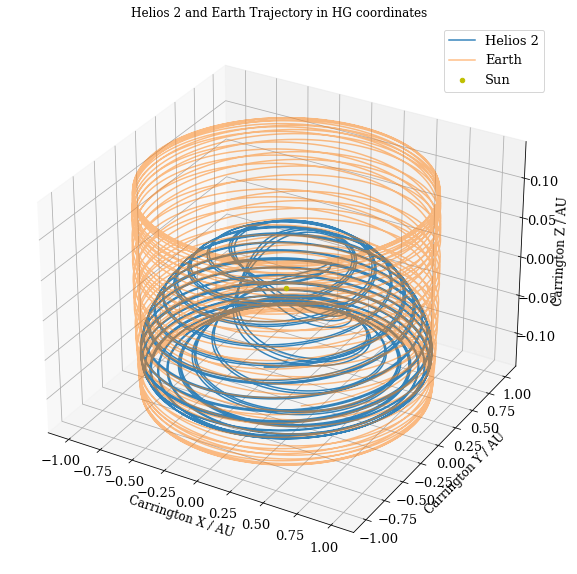

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios2_traj.x.to(u.au), helios2_traj.y.to(u.au), helios2_traj.z.to(u.au), alpha=0.9, label="Helios 2")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="Sun")

_ = ax.set_xlabel("Carrington X / AU", fontsize=fs1)
_ = ax.set_ylabel("Carrington Y / AU", fontsize=fs1)
_ = ax.set_zlabel("Carrington Z / AU", fontsize=fs1)
_ = ax.legend()

_ = ax.set_title("Helios 2 and Earth Trajectory in HG coordinates", fontsize=fs1)
plt.savefig('figures/helios2/helios2_trajectory_location.png')

# Plot the distance between Helios 2 and Earth in HG coordinates

In [17]:
theta_diff2 = np.abs(helios2_traj.coords.lat - earth_traj.coords.lat)
radial_diff2 =  np.abs(helios2_traj.coords.radius.to(u.AU) - earth_traj.coords.radius.to(u.AU))

In [18]:
min_both_index2 = argrelextrema(theta_diff2.value, np.less)

In [19]:
cr1b , cr1e, _ = get_time_interval("cr1653")
cr2b , cr2e, _ = get_time_interval("cr1667")
cr3b , cr3e, _ = get_time_interval("cr1675")

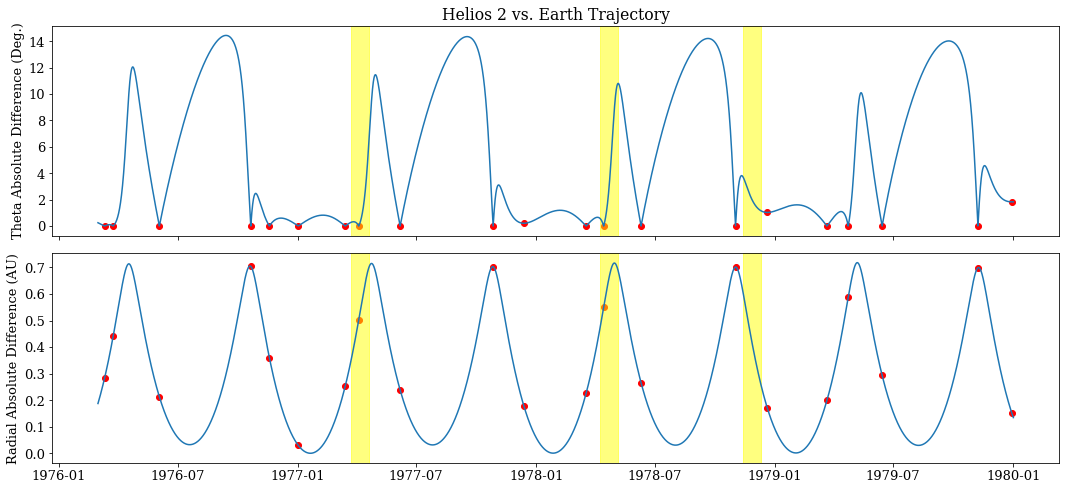

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, sharex=True, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff2)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].axvspan(cr1b, cr1e, alpha=0.5, color='yellow')
_ = ax[0].axvspan(cr2b, cr2e, alpha=0.5, color='yellow')
_ = ax[0].axvspan(cr3b, cr3e, alpha=0.5, color='yellow')
_ = ax[0].set_title("Helios 2 vs. Earth Trajectory")
_ = ax[1].plot(times, radial_diff2)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].axvspan(cr1b, cr1e, alpha=0.5, color='yellow')
_ = ax[1].axvspan(cr2b, cr2e, alpha=0.5, color='yellow')
_ = ax[1].axvspan(cr3b, cr3e, alpha=0.5, color='yellow')


_ = ax[0].scatter(times[min_both_index2], theta_diff2[min_both_index2], c="r")
_ = ax[1].scatter(times[min_both_index2], radial_diff2[min_both_index2], c="r")


plt.tight_layout()
plt.savefig('figures/helios2/helios2_earth_alignment.png')

# Helios 2 local minima

In [21]:
times[min_both_index2]

array(['1976-03-11T04:00:00.000000', '1976-03-24T05:00:00.000000',
       '1976-06-03T00:00:00.000000', '1976-10-20T22:00:00.000000',
       '1976-11-18T09:00:00.000000', '1977-01-01T12:00:00.000000',
       '1977-03-14T13:00:00.000000', '1977-04-04T01:00:00.000000',
       '1977-06-06T11:00:00.000000', '1977-10-26T19:00:00.000000',
       '1977-12-12T18:00:00.000000', '1978-03-18T02:00:00.000000',
       '1978-04-13T23:00:00.000000', '1978-06-10T05:00:00.000000',
       '1978-11-01T19:00:00.000000', '1978-12-20T10:00:00.000000',
       '1979-03-21T15:00:00.000000', '1979-04-23T06:00:00.000000',
       '1979-06-14T03:00:00.000000', '1979-11-07T19:00:00.000000',
       '1979-12-29T13:00:00.000000'], dtype='datetime64[us]')

## Time Inerval Results


#### CR1642, CR1647, CR1654, CR1660, CR1667, CR1675, CR1680, CR1688

In [22]:
for ii in min_both_index2[0]:
    if theta_diff2[ii].to(u.deg).value < 1 and radial_diff2[ii].to(u.au).value > 0.5:
        print(times[ii])

1976-10-20T22:00:00.000000
1977-04-04T01:00:00.000000
1977-10-26T19:00:00.000000
1978-04-13T23:00:00.000000
1978-11-01T19:00:00.000000
1979-04-23T06:00:00.000000
1979-11-07T19:00:00.000000
